In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

## 請安裝
> pip install opencv-python

# Problem : K-Means Clustering
**K-Means Clustering** is an unsupervised learning algorithm for data grouping. In image segmen- tation, it can be applied to partition image pixels into different groups based on the associated pixel values or features. In this problem, you will learn how to segment the provided image by using K-means clustering.

In [2]:
img = cv2.imread('data/bird.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #將色彩空間進行轉換  由BGR轉成RGB

## 1-1. cluster with only RGB values

In [9]:
def km_clust(array, n_clusters):   
    # Define the k-means clustering problem
    k_m = KMeans(n_clusters = n_clusters)
    # Solve the k-means clustering problem
    k_m.fit(array)
    # Get the coordinates of the clusters centres
    center = k_m.cluster_centers_
    print(center)
    # Get the label of each point
    label = k_m.labels_
    return(label, center)

In [23]:
h, w, c = img.shape
#print(img.shape) #讀取影像維度: 高 x 寬 x channel(通道)數
Z = img.reshape((-1,3)) #把資料reshape 成1024*1024(pixel), 3(channel)
#print(Z.shape)
K = 2
label, center = km_clust(Z, K)
# Nox convert back into unit8, and make original image
center = np.uint8(center[:,:3]) #因為色彩沒有小數值，故將其轉換成整數
print(center)

[[163.22243041 197.70646769 120.57954864]
 [107.62252184  95.49924641  71.54498708]]
[[163 197 120]
 [107  95  71]]


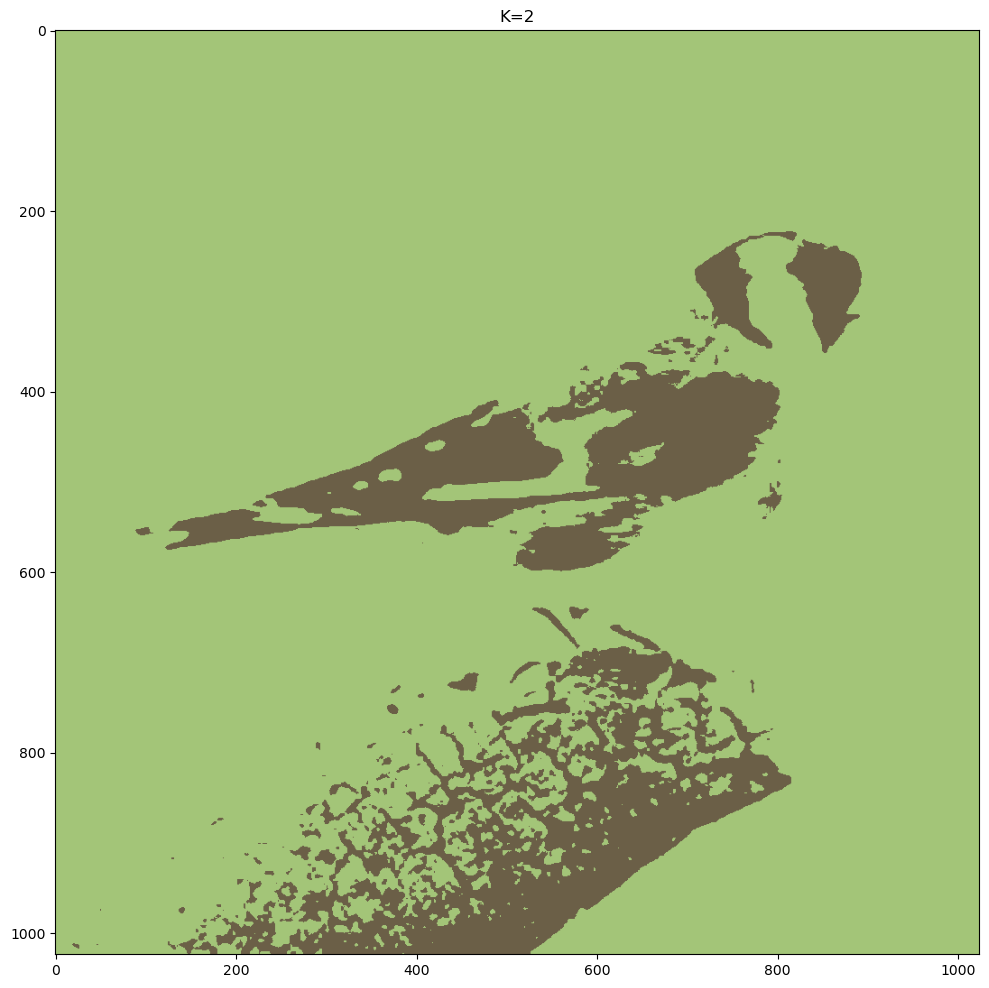

In [24]:
res = center[label.flatten()] #label.flatten() 確保label為1維向量
# label中的每一個點對照回center，label為0者對照為107, 95, 71，label為1者對照為163,197,120
res = res.reshape(img.shape) #將res reshape原本的影像大小

plt.figure(figsize = (16,12))
plt.title('K={}'.format(K))
plt.imshow(res)


[[163.22597756 197.72311134 120.58332123]
 [107.69008695  95.56129696  71.60061825]]
[[163 197 120]
 [107  95  71]]
[[183.86988179 182.65938869 164.72505063]
 [ 58.40633552  55.22268817  46.15322978]
 [143.91280287 128.26937936  97.15368363]
 [160.64713098 204.77738291 114.70378278]]
[[183 182 164]
 [ 58  55  46]
 [143 128  97]
 [160 204 114]]
[[163.4019938  211.85024912 117.6457594 ]
 [115.30681216  99.49777742  67.7896975 ]
 [ 38.35192781  40.533862    40.97608848]
 [198.97048954 200.08294645 188.00434383]
 [170.71121107 165.31115245 143.58615373]
 [154.67529936 192.72734493 110.89348788]
 [149.49602678 134.01217074 104.43894441]
 [220.26154365 190.84984833  36.86265588]]
[[163 211 117]
 [115  99  67]
 [ 38  40  40]
 [198 200 188]
 [170 165 143]
 [154 192 110]
 [149 134 104]
 [220 190  36]]
[[165.29716743 213.73315811 119.5205978 ]
 [115.44166596 103.7716086   72.772315  ]
 [ 45.85421217  56.78354134  69.57020281]
 [189.03523366 191.56941684 174.98231219]
 [159.57835598 140.48164863 

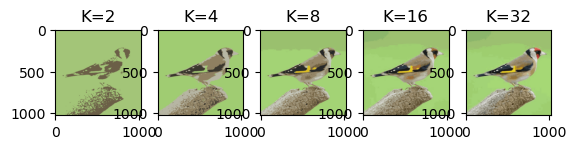

In [25]:
Ka = [2,4,8,16,32]
for i, K  in enumerate(Ka):
    label, center = km_clust(Z, K)
    center = np.uint8(center[:,:3]) 
    res = center[label.flatten()]
    res = res.reshape(img.shape)
    plt.subplot(1,len(Ka), i+1)
    plt.title('K={}'.format(K))
    plt.imshow(res)

plt.show()

## 1-2. cluster with RGB values and the location

In [37]:
h, w, c = img.shape
img[1,1]

array([129, 175, 100], dtype=uint8)

In [35]:
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h], [w]]) #img[h][w]為原本影像的RGB值；np.append(img[h][w], [[h], [w]]) 為原本的RGB值後再加上影像的位置資訊

[[154.52242112 186.804347   117.14501961 508.77064746 254.99709678]
 [156.3686663  180.03752446 110.31428495 514.21817254 766.95221408]]
[[151.88638955 194.10225438 111.36480613 255.69903351 254.01708767]
 [155.5618091  177.48289821 109.29088044 255.70370061 765.79473294]
 [157.03472243 178.84516124 122.67615868 767.99807774 256.77488657]
 [157.29906843 183.29410233 111.54430622 767.38838156 768.99359424]]
[[164.82667284 189.58080687 134.34102095 846.7412625  164.81229578]
 [157.84609728 183.00849072 114.69480194 175.42619923 861.27938325]
 [157.50290322 196.08447753 111.30693749 200.81505692 510.66862674]
 [146.41664733 144.71170244 104.40544519 821.54662123 518.1100348 ]
 [152.3538581  194.61783025 111.94541386 174.85286456 163.02177434]
 [158.10962228 173.99131779 108.02101082 508.01047152 774.17020123]
 [160.40509066 203.07718457 117.78245614 845.51181791 865.18975136]
 [148.26879279 187.69245593 110.86053986 512.69516468 243.35870034]]
[[158.34918744 198.26064898 109.691695   147.

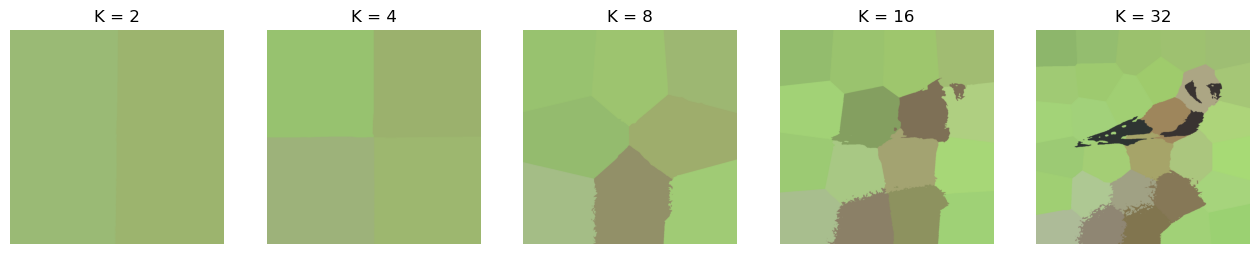

In [26]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h], [w]])
Z = Z.reshape(-1, 5)

Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

## 1-3. explain the differences between the two methods under the same K.
![](images/7.4_result.PNG)

[[158.3367525  193.92354199 120.1463736  121.04254958  61.06465661]
 [152.87967528 174.07404792 108.01380811 133.94706816 187.25003152]]
[[166.12999216 200.20270446 129.36118352 165.65508353  51.00587028]
 [157.87685584 192.32759618 112.38035597  45.49477402 126.83907524]
 [114.25095093 102.21705273  76.21333285 173.90167784 137.39632415]
 [167.57498468 206.36254196 123.00672141 170.45554374 211.59126055]]
[[164.60863171 211.35950276 120.3606233  194.48000963 212.36285272]
 [167.98959078 200.40766864 133.60775875 188.16635983  53.06929512]
 [158.03206071 199.68237501 110.68972517  45.24707219 125.39028484]
 [ 47.12647248  48.03156679  45.95819325 116.68092519 136.69790838]
 [132.15694016 119.83624888  90.22871937 218.40298231 127.95390837]
 [166.59069258 198.4566371  122.18177015  56.35971693 220.43650123]
 [162.72794976 145.16180985 105.89321847 124.15164134 156.61893618]
 [156.22456213 200.99692309 114.56499024  67.72292554  41.57071975]]
[[157.47341454 196.89234668 109.63523907  34.

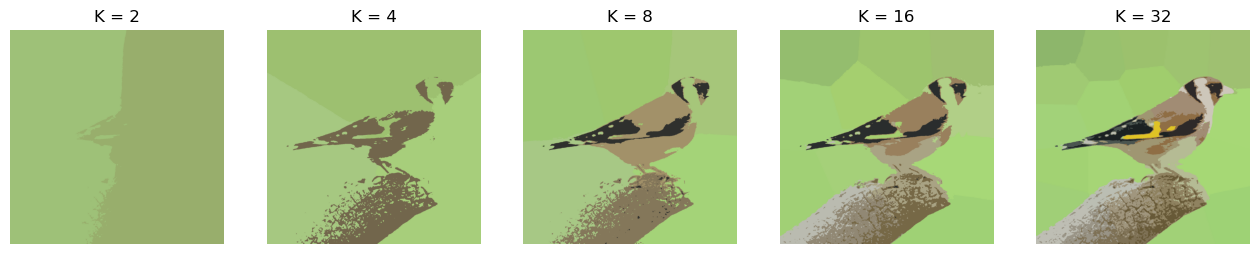

In [27]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h/4], [w/4]])
Z = Z.reshape(-1, 5)

Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()